# Evaluating Automobile Mpg given its attributes.

## The dataset is from Kaggle but was uploaded from the UCI Machine Learning Repository in which it was sourced from the Statlib Library which is maintained by Carnegie Mellon. The dataset was also used in the 1983 American Statistical Association Exposition.

#### Meta data

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. orsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

### Importing libraries and inital analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
sns.set()

In [50]:
# Reading the data
df = pd.read_csv('auto-mpg.csv')

In [3]:
# viewing the first 5 rows.
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


There are 8 features above and our target of mpg. Furthermore, there are data types that are incorrect and cannot be used in our model therefore they must be changed. For instance, the horsepower feature is a string and must be float. The int data type should also be a float.

In [6]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In addition to the data types being wrong, it appears that there are missing values, except there are not in NaN format that Pandas would recognize, rather they are stored in as a string in particular as a question mark. They must first be converted as a Nan value before they can be dropped.

In [7]:
df['horsepower'] = df['horsepower'].str.replace('?', '0')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
df['horsepower'] = df['horsepower'].replace(0, np.nan)

In [10]:
df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 31.1+ KB


In [13]:
df['cylinders'] = df['cylinders'].astype(float)

In [14]:
df['weight'] = df['weight'].astype(float)

In [15]:
df['horsepower'] = df['horsepower'].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 31.1+ KB


#### We have dropped the columns with the question marks, as well as converted the columns with the incorrect data type into the proper data type so that we can conduct proper analysis of our data.

In [17]:
def plot_function(title, xlabel, ylabel):
    """  This is a custom function to avoid repeating the lines of code that
         write the titles, the axis of the plots
    """
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### Is there a relationship between vehicle horsepower and vehicle mpg?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


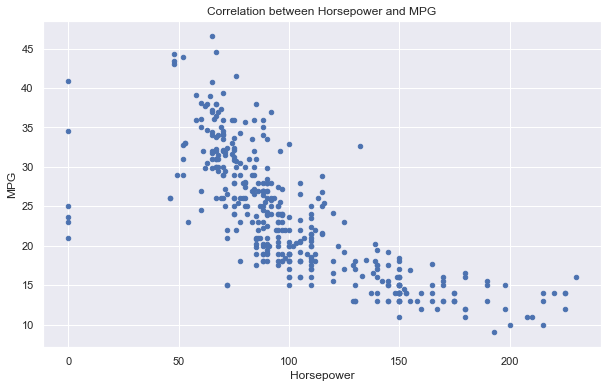

In [18]:
df.plot.scatter(x='horsepower', y='mpg', figsize=(10, 6))
plot_function('Correlation between Horsepower and MPG', 'Horsepower', 'MPG')

#### It appears that there is a relationship between these two features, however, it is not linear but let's perform a log transformation and see what happens.

In [19]:
df['mpg'] = np.log(df['mpg'])

In [20]:
df['mpg'].head()

0    2.890372
1    2.708050
2    2.890372
3    2.772589
4    2.833213
Name: mpg, dtype: float64

### Scatter Plot of vehicle Horsepower and MPG after performing log transformation.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


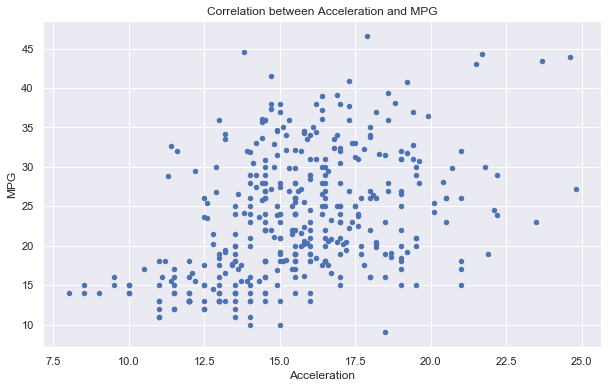

In [78]:
df.plot.scatter(x='acceleration', y='mpg', figsize=(10, 6))
plot_function('Correlation between Acceleration and MPG', 'Acceleration', 'MPG')

As you can see by looking at the plot above, there is no visible linear relationship between Acceleration and Mpg.

### Is there a relationship between vehicle weight and vehicle mpg?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


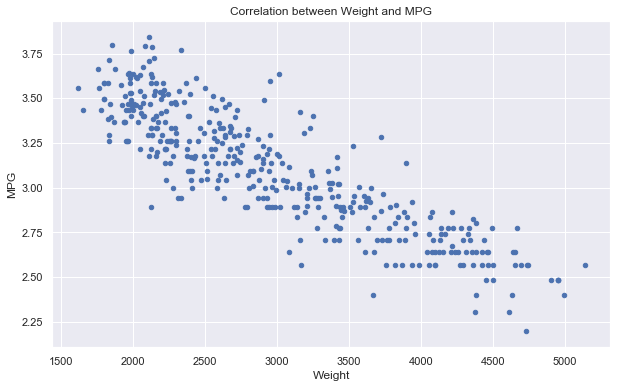

In [22]:
df.plot.scatter(x='weight', y='mpg', figsize=(10, 6))
plot_function('Correlation between Weight and MPG', 'Weight', 'MPG')

#### It appears that there is a linear relationship present here.

### Plotting a scatter plot with a line of best fit to get a better sense of the relationship.

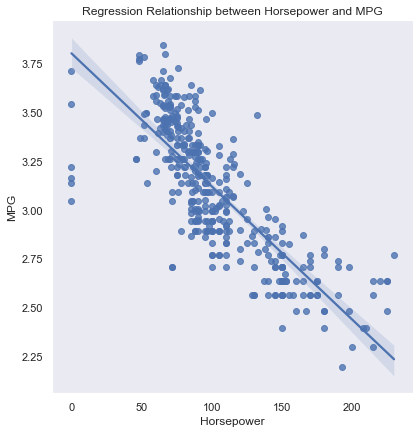

In [23]:
sns.lmplot(x='horsepower', y='mpg', data=df, height=6)
plot_function('Regression Relationship between Horsepower and MPG', 'Horsepower', 'MPG')
plt.grid(False)

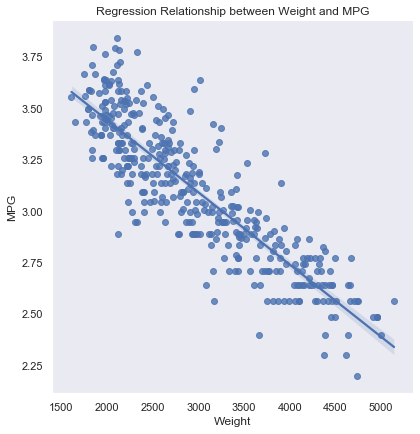

In [24]:
sns.lmplot(x='weight', y='mpg', data=df, height=6)
plot_function('Regression Relationship between Weight and MPG', 'Weight', 'MPG')
plt.grid(False)

### Fitting a line with the data, we can tell that this won't be accurate, I fit the line to the existing data to demonstrate the inconsistency when fitting a line to the data without transforming it.

In [25]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,3.101384,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,0.339656,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,2.197225,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,2.862201,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,3.135494,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,3.367296,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,3.841601,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [26]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.825758,-0.853619,-0.805544,-0.875567,0.445809,0.576342,0.558329
cylinders,-0.825758,1.000000,0.950721,0.821656,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.853619,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.805544,0.821656,0.871927,1.000000,0.837987,-0.673940,-0.411587,-0.418636
weight,-0.875567,0.896017,0.932824,0.837987,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.445809,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,0.288137,0.205873
model year,0.576342,-0.348746,-0.370164,-0.411587,-0.306564,0.288137,1.000000,0.180662
origin,0.558329,-0.562543,-0.609409,-0.418636,-0.581024,0.205873,0.180662,1.000000


### Assessing the correlation of all the features present in a single heatmap.

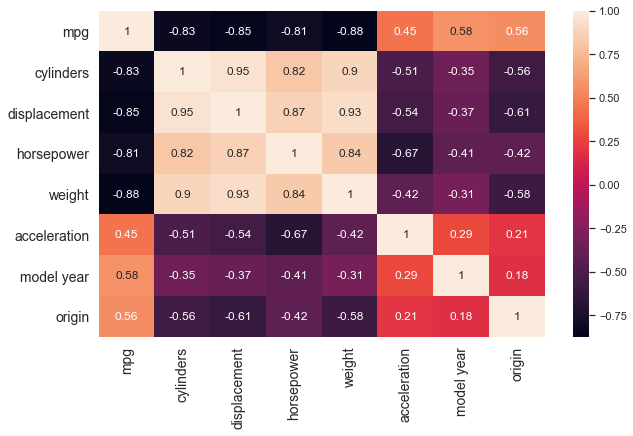

In [27]:
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(df.corr(), annot=True)
plt.show()

The plot does not look exactly like how we want is because that the variables have different data types which interfere from showing us a complete picture.

In [28]:
group = df.groupby('model year')['mpg'].mean()

### Has average vehicle mpg increased over time.

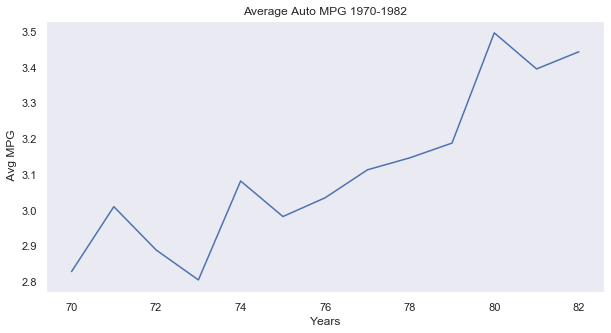

In [29]:
plt.figure(figsize=(10, 5))
group.plot()
plot_function('Average Auto MPG 1970-1982', 'Years', ' Avg MPG')
plt.grid(False)

A general consensus is that the average car mpg has increased over the years.

The data type of model year is not continous, therefore, we could not simply pass it in the scatter plot argument to visualize the trend over time so we used the Pandas groupby function in order to plot the average miles per gallon over the years. 

### Is the distribution of the MPG variable approximately normal?

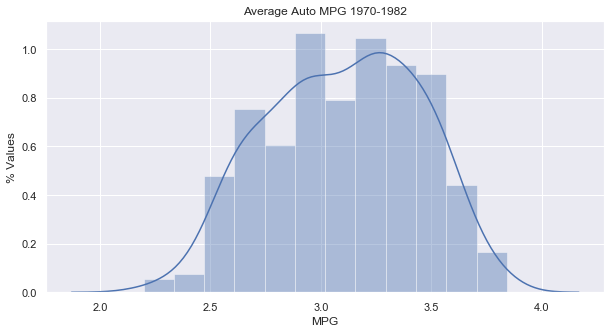

In [30]:
plt.figure(figsize=(10, 5))
sns.distplot(df['mpg'])
plot_function('Average Auto MPG 1970-1982', 'MPG', '% Values')

It appears that our distribution is not normal, that is to be expected because in the real world it is hard to find things that have a normal distribution.

In [31]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [51]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [54]:
df['country'] = df.origin.replace([1,2,3], ['USA', 'JAPAN', 'EUROPE'])

In [56]:
df.drop(['Country'], axis=1, inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   country       398 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 31.2+ KB


### How does average miles per gallon compare with cars manufactured from different countries?

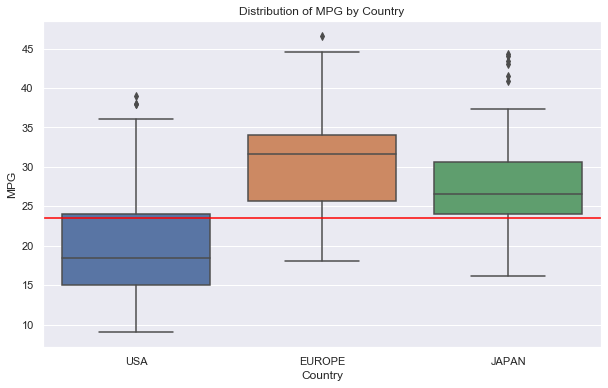

In [79]:
plt.figure(figsize=(10,6))
sns.boxplot(x='country', y='mpg', data=df)
plt.axhline(df['mpg'].mean(), c='red')
plot_function('Distribution of MPG by Country', 'Country', 'MPG')

#### It appears that european cars tend to have better car mileage overall.

### Have car mpg increased differently by country?

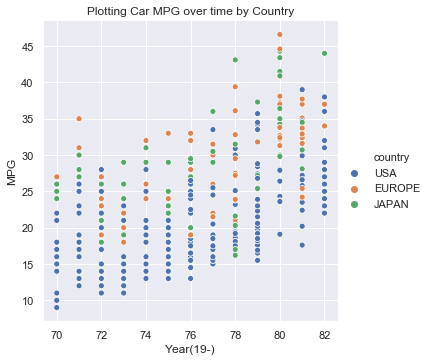

In [80]:
sns.relplot(x="model year", y="mpg", hue="country", data=df)
plot_function('Plotting Car MPG over time by Country', 'Year(19-)', 'MPG')

#### It appears that every single car's mpg has been increasing over time, but european cars tend to have an advantage which is what we found in the boxplot as well.

### Have car acceleration increased differently by country?

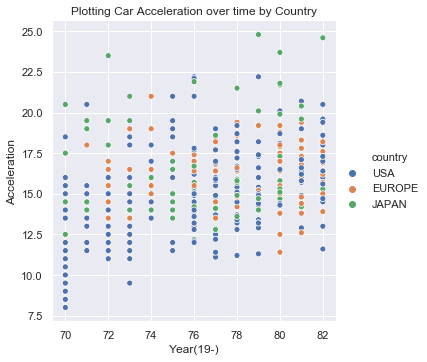

In [81]:
sns.relplot(x="model year", y="acceleration", hue="country", data=df)
plot_function('Plotting Car Acceleration over time by Country', 'Year(19-)', 'Acceleration')

#### As you can see, although a good chunk of the countries have similar acceleration, Japanese vehicles have an edge with their acceleration being a bit higher.

In [73]:
acc = df.groupby('model year')['acceleration'].mean()

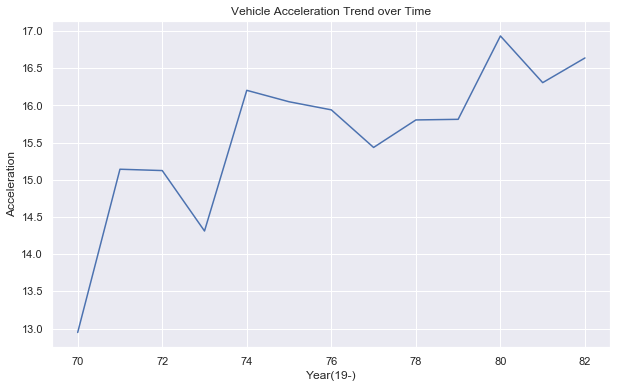

In [82]:
plt.figure(figsize=(10,6))
acc.plot()
plot_function('Vehicle Acceleration Trend over Time', 'Year(19-)', 'Acceleration')

### Preparing our Features for modeling.

#### We have done ample analysis and now we will begin the Machine Learning portion.

In [32]:
# Selecting our features

X = df.drop(['mpg', 'model year', 'origin', 'car name'], axis=1)

In [33]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration
0,8.0,307.0,130.0,3504.0,12.0
1,8.0,350.0,165.0,3693.0,11.5
2,8.0,318.0,150.0,3436.0,11.0
3,8.0,304.0,150.0,3433.0,12.0
4,8.0,302.0,140.0,3449.0,10.5


Our features are going to be everything except our target(mpg), model year, origin, and car name.

In [34]:
y = df['mpg']

In [35]:
# Splitting the dataset into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [36]:
# Instantiating LinearRegression

reg = LinearRegression()

In [37]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Our Linear regression model has run without any issues.

In [38]:
y_predictions = reg.predict(X_test)
print(y_predictions.mean())

3.109820635270784


In [39]:
y_test.describe()

count    120.000000
mean       3.110703
std        0.334477
min        2.302585
25%        2.883329
50%        3.146247
75%        3.340977
max        3.784190
Name: mpg, dtype: float64

Based on the initial glance, our model predictions has a mean of 23.9 which is 0.9 higher than the mean in our actual dataset which all things considered is still pretty close.

## Calculating the Root Mean Squared of the model.

In [40]:
RMSE = mean_squared_error(y_true=y_test, y_pred=y_predictions)
print(RMSE)

0.022115615017766103


In [41]:
df_coeff = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])

In [42]:
df_coeff

,Coefficient
cylinders,-0.008009
displacement,-0.000595
horsepower,-0.001786
weight,-0.000208
acceleration,-0.000759


### Plotting the relationship between the actual and predicted values for linear regression.

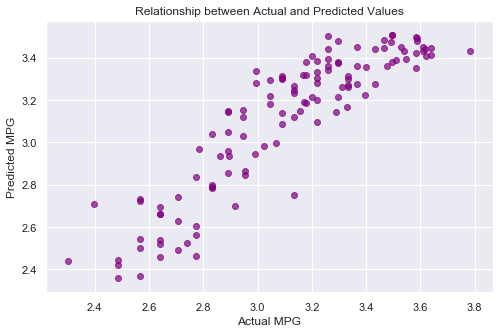

In [43]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_predictions, alpha=0.7, c='purple')
plot_function('Relationship between Actual and Predicted Values', 'Actual MPG', 'Predicted MPG')

What we have above is a scatter plot depicting the correlation between the actual test values that we stored in y_test, and the predicted models that we received from our Linear Regression model. As you can see there is a relationship between the two, however it isn't wuite linear.

In [44]:
re = DecisionTreeRegressor()

In [45]:
re.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
pre = re.predict(X_test)
print(pre.mean())

3.109246115920181


In [47]:
y_test.describe()

count    120.000000
mean       3.110703
std        0.334477
min        2.302585
25%        2.883329
50%        3.146247
75%        3.340977
max        3.784190
Name: mpg, dtype: float64

In [48]:
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=pre))
print(rmse)

0.20184932906990422


### Plotting the actual and predicted values for decision tree regression

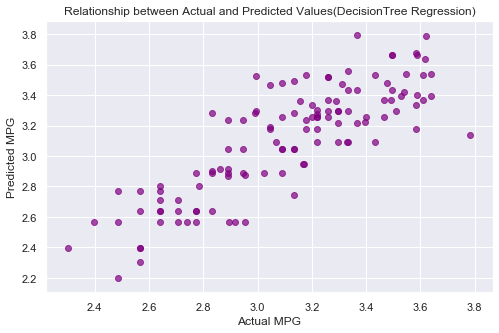

In [49]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, pre, alpha=0.7, c='purple')
plot_function('Relationship between Actual and Predicted Values(DecisionTree Regression)', 'Actual MPG', 'Predicted MPG')